In [1]:
#1.+Cifar_10_with_dropout_without_BN

In [1]:
# import libraries
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# batch, classes, epochs
batch_size = 32
num_classes = 10
epochs = 50

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


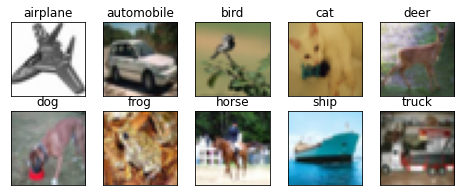

In [4]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [9]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0811 - accuracy: 0.2283 - val_loss: 1.8061 - val_accuracy: 0.3694
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7559 - accuracy: 0.3631 - val_loss: 1.6312 - val_accuracy: 0.4111
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5642 - accuracy: 0.4285 - val_loss: 1.4890 - val_accuracy: 0.4656
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4407 - accuracy: 0.4753 - val_loss: 1.3989 - val_accuracy: 0.4989
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3534 - accuracy: 0.5132 - val_loss: 1.2613 - val_accuracy: 0.5534
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2810 - accuracy: 0.5392 - val_loss: 1.1737 - val_accuracy: 0.5860
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2177 - accuracy: 0.5644 - val_loss: 1.0943 - val_ac

In [10]:
# 2.+Cifar_10_Notebook_with_BN_without_dropout

In [11]:
from keras.layers.normalization import BatchNormalization

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
# summary of the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)       

In [14]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [15]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5925 - accuracy: 0.4424 - val_loss: 3.3855 - val_accuracy: 0.1922
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2015 - accuracy: 0.5714 - val_loss: 1.3459 - val_accuracy: 0.5148
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0466 - accuracy: 0.6308 - val_loss: 1.3731 - val_accuracy: 0.5280
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9385 - accuracy: 0.6668 - val_loss: 1.6636 - val_accuracy: 0.4986
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8576 - accuracy: 0.6982 - val_loss: 2.5075 - val_accuracy: 0.3969
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7857 - accuracy: 0.7222 - val_loss: 1.2157 - val_accuracy: 0.6086
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7313 - accuracy: 0.7400 - val_loss: 0.8116 -

In [16]:
#Result: The training accuracy is increasing because of BN but the difference between train accuracy and validation accuracy is low.

In [17]:
# 3.+Cifar_10_notebook

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
# summary of the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)       

In [20]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [21]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3553 - accuracy: 0.0999 - val_loss: 2.3335 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3042 - accuracy: 0.1011 - val_loss: 2.3191 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3034 - accuracy: 0.0974 - val_loss: 2.3252 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3032 - accuracy: 0.1003 - val_loss: 2.3346 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3030 - accuracy: 0.0954 - val_loss: 2.3116 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3031 - accuracy: 0.0996 - val_loss: 2.3195 -

In [24]:
# this should havw been accuracy=89% and the test accuracy = 82%

In [25]:
# 4.+Cifar10_l2_notebook

In [26]:
from keras.regularizers import l2

In [27]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Flatten())
model4.add(Dense(512,kernel_regularizer=l2(0.01)))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [28]:
# summary of the model
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)       

In [29]:
# compile
model4.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [30]:
# Training the model
model4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 8.5490 - accuracy: 0.0999 - val_loss: 9.5004 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 5.6399 - accuracy: 0.0977 - val_loss: 6.4031 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 4.0885 - accuracy: 0.0993 - val_loss: 4.6091 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 3.2583 - accuracy: 0.0986 - val_loss: 3.5882 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.8141 - accuracy: 0.0974 - val_loss: 3.0114 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.5763 - accuracy: 0.0983 - val_loss: 2.6881 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.4491 - accuracy: 0.0989 - val_loss: 2.5132 -